<a href="https://colab.research.google.com/github/jubayer032003/Hand_Writting_Prediction/blob/main/Hand_Writting_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
#Loding the MNIST Data:


In [ ]:
(X_train ,Y_train) , (X_test , Y_test) = mnist.load_data()

In [ ]:
type(X_train)
print(X_train.shape , Y_train.shape ,X_test.shape , Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data = 60,000 img
test data = 10,000 img

img dimention -->  28 28
gryscale img --> 1 cahnnel

In [ ]:
#printion the 11th img

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

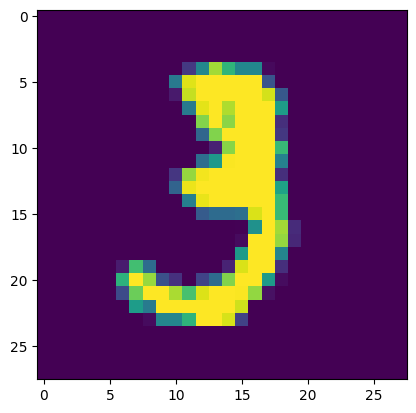

(28, 28)
3


In [ ]:
y = X_train[10]
plt.imshow(y)
plt.show()
print(y.shape)

#print the corresponding label
print(Y_train[10])

In [ ]:
#scaling the values :
X_train = X_train/255
X_test = X_test/255

print(X_train[10])
print(X_test[10])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [ ]:
#build a neural network
#setting up the layer of the Neural Network


from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='sigmoid')
])


In [ ]:
#compiling the neural network

model.compile(optimizer='adam' ,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#training the neural network :

model.fit(X_train, Y_train ,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6857 - loss: 0.9560
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8910 - loss: 0.3841
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9093 - loss: 0.3247
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9198 - loss: 0.2853
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9254 - loss: 0.2673
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9284 - loss: 0.2614
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9299 - loss: 0.2499
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9330 - loss: 0.2433
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9329 - loss: 0.2332
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9378 - loss: 0.2230


In [ ]:
#trinig data accuracy  :

loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9543 - loss: 0.1581
0.9599000215530396


In [ ]:
print(X_test.shape)

(10000, 28, 28)


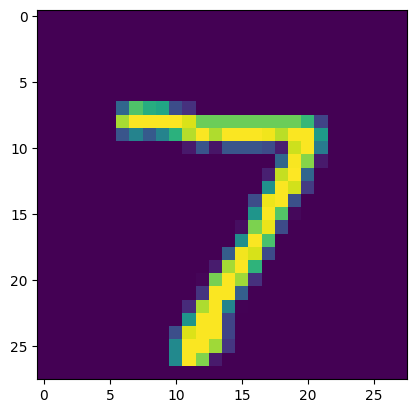

In [ ]:
#first data point in X-test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)
print(Y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[7.4743394e-09 2.3242982e-01 2.4282797e-01 8.2258886e-01 1.4236053e-07
 1.6091330e-04 5.9115690e-14 9.9999976e-01 1.5397996e-05 2.1304146e-03]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
#converting the prediction probabilites to class label

label_for_first_test_img = np.argmax(Y_pred[0])
print(label_for_first_test_img)

7


In [ ]:
Y_pred_label=[np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)